In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df = pd.read_csv('Mall_Customers.csv')

In [91]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [92]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [93]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [94]:
from sklearn.cluster import KMeans

In [95]:
wcss = []
for i in range(1,20):
    kmean  = KMeans(n_clusters=i , init='k-means++', random_state=30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)


In [96]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25079.766962115882,
 21850.16528258562,
 19787.67055496685,
 18004.8218348464,
 16372.662146832501,
 14349.754043342282,
 13408.710180900964,
 12097.942504133285,
 10757.36670233006,
 10210.711191001985,
 9257.46990745827,
 8614.395015683376]

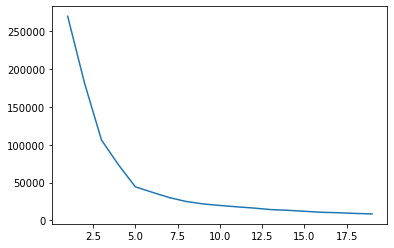

In [97]:
plt.plot(range(1,20) , wcss)

In [98]:
kmean = KMeans(n_clusters=5,init = 'k-means++',random_state=30)

In [99]:
kmean.fit(x)

KMeans(n_clusters=5, random_state=30)

In [100]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [101]:
x['cluster number'] = kmean.fit_predict(x)

<ipython-input-101-6c627dceb091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster number'] = kmean.fit_predict(x)


In [102]:
x

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [103]:
x[x['cluster number'] ==4]

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [104]:
x[x['cluster number'] ==0]

,Annual Income (k$),Spending Score (1-100),cluster number
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0


In [105]:
kmean.predict([[45,35]])

array([2])

In [106]:
from sklearn.cluster import MiniBatchKMeans
mini_kmean = MiniBatchKMeans(n_clusters=5)

In [48]:
mini_kmean.fit(x[['Annual Income (k$)','Spending Score (1-100)']])

MiniBatchKMeans(n_clusters=5)

In [47]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [49]:
mini_kmean.predict([[45,56]])

array([1])

In [78]:
from sklearn.cluster import DBSCAN

In [79]:
dbscan  = DBSCAN(eps=5 , min_samples=4)

In [80]:
dbscan.fit(x[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=5, min_samples=4)

In [81]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [82]:
x1 = x[['Annual Income (k$)','Spending Score (1-100)']]

In [83]:
x1['dbscan_cluster_name '] = dbscan.labels_

In [84]:
x1

,Annual Income (k$),Spending Score (1-100),dbscan_cluster_name
0,15,39,-1
1,15,81,0
2,16,6,-1
3,16,77,0
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [85]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [107]:
x

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [108]:
x1

,Annual Income (k$),Spending Score (1-100),dbscan_cluster_name
0,15,39,-1
1,15,81,0
2,16,6,-1
3,16,77,0
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [109]:
true_label  = x['cluster number']

In [113]:
predicted_label = x1['dbscan_cluster_name ']

In [112]:
x1.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'dbscan_cluster_name '], dtype='object')

In [114]:
from sklearn import metrics

In [115]:
metrics.adjusted_rand_score(true_label,predicted_label)

0.5641095154835344

In [119]:
metrics.jaccard_score(true_label,predicted_label)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [120]:
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [121]:
from sklearn.metrics import jaccard_similarity_score

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [122]:
metrics.homogeneity_score(true_label,predicted_label)

0.6007983436060925